### Importing linraries

In [3]:
import pandas as pd
import numpy as np

#To reset seed so same set of numbers are produced
np.random.seed(42)

In [4]:
data = pd.read_csv(r'C:\Users\RISHABH RATHORE\OneDrive\Desktop\Project\Deep_Learning\DataSets/banknotes.csv')

### Head of the dataset

In [5]:
data.head(5)

,variance,skewness,curtosis,entropy,class
0,-0.89569,3.00250,-3.606700,-3.44570,1
1,3.47690,-0.15314,2.530000,2.44950,0
2,3.91020,6.06500,-2.453400,-0.68234,0
3,0.60731,3.95440,-4.772000,-4.48530,1
4,2.37180,7.49080,0.015989,-1.74140,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


### Count of null values column wise

In [7]:
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

### Inspect unique values in every feature

In [8]:
for col in data.columns:
    print("{}:{}".format(col,data[col].nunique()))

variance:1338
skewness:1256
curtosis:1270
entropy:1156
class:2


### Basic statistics feautre wise

In [9]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### returns all the features and shape

In [14]:
data.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [15]:
data.shape

(1372, 5)

### Check the missing values in the dataset

In [17]:
data.isnull().values.any()

False

### Activation Functions
1. The sigmoid function is a special form of the logistic function and is usually denoted by σ(x) or sig(x). It is given by:
σ(x) = 1/(1+exp(-x))

In [18]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [19]:
data['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [23]:
#!pip install seaborn

### Ploting pairplot

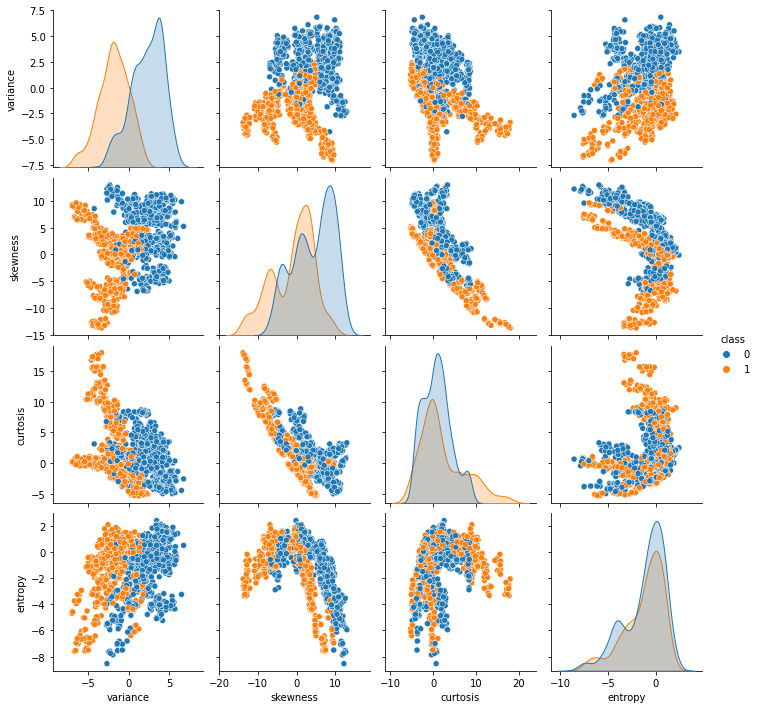

In [28]:
import seaborn as sns
sns.pairplot(data=data, hue='class')

array([[<AxesSubplot:title={'center':'variance'}>,
        <AxesSubplot:title={'center':'skewness'}>],
       [<AxesSubplot:title={'center':'curtosis'}>,
        <AxesSubplot:title={'center':'entropy'}>],
       [<AxesSubplot:title={'center':'class'}>, <AxesSubplot:>]],
      dtype=object)

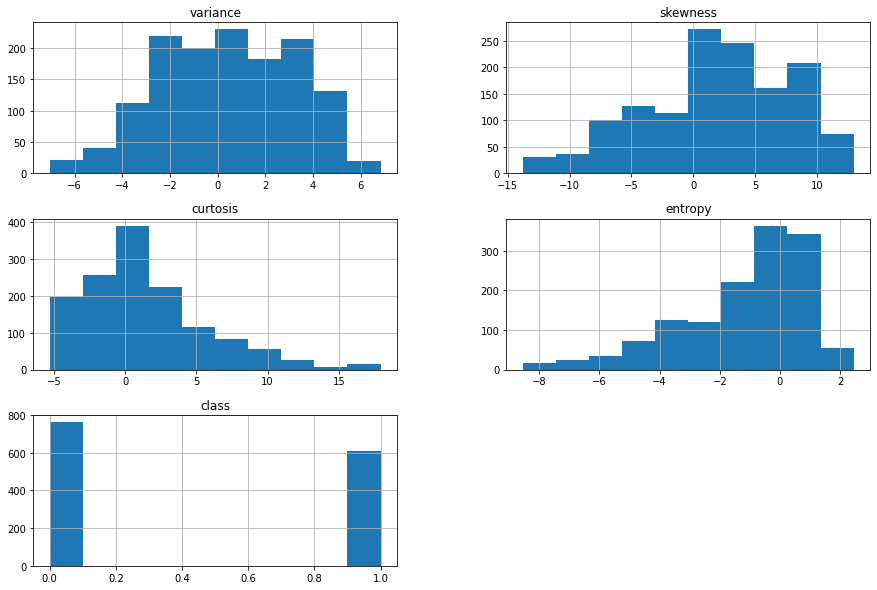

In [29]:
data.hist(figsize=(15,10))

##  Design of a Neural Network from scratch

In [54]:
# '''

# *************<IMP>*************
# Mention hyperparameters used and describe functionality in detail in this space
# - carries 1 mark
# '''
class NN:
    
    ''' X and Y are dataframes'''
    def __init__(self,numHlayers=2):
        
        #number of hidden layers the ANN has
        self.numHlayers = numHlayers
    
    def fit(self,X,Y):
        '''
        Function that trains the neural network by talking x_train and y_train samples as input
        '''
        input1=X
        result1=Y
        
        #If the ANN has two hidden layer we initialize it calling ANN_layer class
        
        if(self.numHlayers==2):
            
            #First layer is initialized with parameter 1 :Number of inputs
            #                                parameter 2 :Number of neurons
            #similarly hidden layer and output layer is initialised
            self.Hlayer1 =ANN_layers(7,24)
            self.Hlayer2 =ANN_layers(24,24)
            self.Output_layer =ANN_layers(24,2)
            
            #Between each layer we have the activation function class with a 
            #wide range of activation functions 
            
            self.act1=activation()
            self.act2=activation()
            
            # using the softmax function on the final layer 
            self.loss_activation=Activation_softmax_LCCE()
            
            #So for optimizer we can choose between Adam and SGD optimizer
            #Creating optimizer
            self.optimize=optimizer(l_rate=0.05,decay=5e-7)
            
            
            #Loop to train in
            for epoch in range(4001):
                
                #pass input X through first layer
                self.Hlayer1.fpropogation(input1)
                
                #Output of first layer passes through the firstactivation function
                self.act1.fRelu(self.Hlayer1.output)
                
                #Output of first activation is sent in forward pass to second layer
                self.Hlayer2.fpropogation(self.act1.output)
                
                 #Output ofsecond layer passes through the next activation function
                self.act2.fRelu(self.Hlayer2.output)
                
                # Perform a forward pass through the activation/loss function
                # takes the output of second dense layer here and returns loss
                self.Output_layer.fpropogation(self.act2.output)
                loss = self.loss_activation.forward(self.Output_layer.output,result1)
                
                #Argmax returns the predictions for the foward pass
                prediction = np.argmax(self.loss_activation.output,axis=1)
                
                #calculate values along first axis
                if len(result1.shape)==2:
                    result1=np.argmax(result1,axis=1)
                #returns the accuracy of our predictions in this pass
                accuracy= np.mean(prediction==result1)
                
                #priniting for every 100Th epoch 
                if not epoch %100:
                    print(f'epoch:{epoch} ,'+
                          f'accuracy:{accuracy:.3f} ,'+
                          f'loss:{loss} ,'+
                          f'lr:{self.optimize.curr_l_rate},')
                    
                #back propogation 
                #The values are propogated backwards and the dinputs are updated
                self.loss_activation.backpass(self.loss_activation.output,result1)
                self.Output_layer.Bpropogation(self.loss_activation.dinputs)
                self.act2.back(self.Output_layer.dinputs)
                self.Hlayer2.Bpropogation(self.act2.dinputs)
                self.act1.back(self.Hlayer2.dinputs)
                self.Hlayer1.Bpropogation(self.act1.dinputs)
                
                
                #Update in weights and the biases
                self.optimize.initial_update_param()
                self.optimize.update_params(self.Hlayer1)
                self.optimize.update_params(self.Hlayer2)
                self.optimize.update_params(self.Output_layer)
                self.optimize.post_update_params()
        
        
        #If ANN has 1 hidden layer we initialize it calling ANN_layer()
        
        if(self.numHlayers==1):
            
            # layers are initialized with parameter 1 :Number of inputs
            #                             parameter 2 :Number of neurons
            #similarly hidden layer and output layer is initialised
            
            self.Hlayer1 =ANN_layers(7,128)
            self.Output_layer =ANN_layers(128,2)
            #Between each layer we have the activation function class with a 
            #wide range of activation functions 
            
            self.act1=activation()
            
            # using the softmax function on the final layer
            self.loss_activation=Activation_softmax_LCCE()
            
            #So for optimizer we can choose between Adam and SGD optimizer
            #Creating optimizer
            self.optimize=optimizer(l_rate=0.05,decay=5e-7)
            
            #Loop to train in
            for epoch in range(4001):
                
                
                #pass input X through first layer
                #Output of first layer passes through the firstactivation function
                # Perform a forward pass through the activation/loss function
                # takes the output of second dense layer here and returns loss
                self.Hlayer1.fpropogation(input1)
                self.act1.fRelu(self.Hlayer1.output)
                self.Output_layer.fpropogation(self.act1.output)
                loss = self.loss_activation.forward(self.Output_layer.output,result1)
                
                #Argmax returns the predictions for the foward pass
                prediction = np.argmax(self.loss_activation.output,axis=1)
                
                #calculate values along first axis
                if len(result1.shape)==2:
                    result1=np.argmax(result1,axis=1)
               
                #returns the accuracy of our predictions in this pass
                accuracy= np.mean(prediction==result1)
               
                
                #priniting for every 100Th epoch
                if not epoch %100:
                    print(f'epoch:{epoch} ,'+
                          f'accuracy:{accuracy:.3f} ,'+
                          f'loss:{loss} ,'+
                          f'lr:{self.optimize.curr_l_rate},')
                
                
                #back propogation 
                #The values are propogated backwards and the dinputs are updated
                
                self.loss_activation.backpass(self.loss_activation.output,result1)
                self.Output_layer.Bpropogation(self.loss_activation.dinputs)
                self.act1.back(self.Output_layer.dinputs)
                self.Hlayer1.Bpropogation(self.act1.dinputs)
                
                
                #Update in weights and the biases

                self.optimize.initial_update_param()
                self.optimize.update_params(self.Hlayer1)
                self.optimize.update_params(self.Output_layer)
                self.optimize.post_update_params()
                
               
    
    
    def predict(self,X,Y):

        """
        The predict function performs a simple feed forward of weights
        and outputs yhat values 

        yhat is a list of the predicted value for df X
        
        Only Forward pass to be performed in already trained model
        """
        
        #Only Forward pass to be performed in already trained model
        x_test=X
        y_test=Y
        #If ANN has 2 hidden layer we call the  ANN_layer() objects
        if(self.numHlayers==2):
            #pass input to the first layer 
            self.Hlayer1.fpropogation(x_test)
            
            #layer 1 activation func
            self.act1.fRelu(self.Hlayer1.output)
            
            #output of act1 to 2nd layer
            self.Hlayer2.fpropogation(self.act1.output)
            
            #layer 2 activation func
            self.act2.fRelu(self.Hlayer2.output)
            self.Output_layer.fpropogation(self.act2.output)
            
            #loss/activation for output layer
            loss = self.loss_activation.forward(self.Output_layer.output,y_test)
            
            #Argmax returns our models predictions
            prediction = np.argmax(self.loss_activation.output,axis=1)
            if len(y_test.shape)==2:
                result1=np.argmax(y_test,axis=1)
            
            #Accuracy out model has attained
            accuracy= np.mean(prediction==y_test)
            print(f'accuracy:{accuracy:.3f} ,'+
                  f'lr:{self.optimize.curr_l_rate},')
            
            #return the prediction
            yhat=prediction
            return yhat
       
    
        #If ANN has 1 hidden layer we call the  ANN_layer() objects
        if(self.numHlayers==1):
            #pass input to the first layer 
            self.Hlayer1.fpropogation(x_test)
            
            #layer 1 activation func
            self.act1.fRelu(self.Hlayer1.output)
            
            self.Output_layer.fpropogation(self.act1.output)
            #loss/activation for output layer
            loss = self.loss_activation.forward(self.Output_layer.output,y_test)
            
            #Argmax returns our models predictions
            prediction = np.argmax(self.loss_activation.output,axis=1)
            if len(y_test.shape)==2:
                result1=np.argmax(y_test,axis=1)
            
            #Accuracy out model has attained
            accuracy= np.mean(prediction==y_test)
            print(f'accuracy:{accuracy:.3f} ,'+
                  f'lr:{self.optimize.curr_l_rate},')
            #return the prediction
            yhat=prediction
            return yhat
        
    
    def CM(self,y_test,y_test_obs):
        
        """
        Since our prediction are already given in list np.array we dont 
        need to convert confidence values
        """
        #2x2 matrix 
        cm=np.array([[0,0],[0,0]])
        fp=0 #false positive
        fn=0 #false negative
        tp=0 #true Positive
        tn=0 #true negative
        
        #loop over number of samples
        for i in range(len(y_test)):
            if(y_test[i]==1 and y_test_obs[i]==1):
                tp=tp+1
            if(y_test[i]==0 and y_test_obs[i]==0):
                tn=tn+1
            if(y_test[i]==1 and y_test_obs[i]==0):
                fp=fp+1
            if(y_test[i]==0 and y_test_obs[i]==1):
                fn=fn+1
        cm[0][0]=tn
        cm[0][1]=fp
        cm[1][0]=fn
        cm[1][1]=tp
        
        p= tp/(tp+fp) #precision
        r=tp/(tp+fn)  #recall
        f1=(2*p*r)/(p+r) #f1 score
        
        
        print("Confusion Matrix : ")
        print(cm)
        print("\n")
        print(f"Precision : {p}")
        print(f"Recall : {r}")
        print(f"F1 SCORE : {f1}")

In [55]:
#layer class so each layer can be intilialised as an object 
class ANN_layers:
    
    # layer properties
    def __init__(self,num_inputs ,num_cells):
        
        #initializing weights and biases
        self.weights = 0.1 * np.random.randn(num_inputs,num_cells) #in range[-1,1]
        self.biases = np.zeros((1,num_cells))
    
    #forward pass
    def fpropogation(self , inputs):
        
        #forward pass
        self.inputs= inputs
        
        #Calculate output values from inputs,weights and biases
        self.output= np.dot(inputs ,self.weights)
    
    #back pass
    def Bpropogation(self,dval):
        #gradient on parameters and values
        self.dweights= np.dot(self.inputs.T,dval)
        self.dbiases = np.sum(dval,axis=0,keepdims=True)
        self.dinputs =np.dot(dval,self.weights.T)

def confidenceTolist(x):
    #to convert a given confidence matrix to list of predictions
    rows = x.shape[0]
    cols = x.shape[1]
    predict=[None]*rows
    for i in range(0,rows):
        if(x[i,0]>x[i,1]):
            predict[i]=0
        else:
            predict[i]=1
    return predict
        
        
    
#Activation class with different activation func        
class activation:
    
    #RELU activation
    #makes copy of input values
    def fRelu(self,x):
        self.inputs=x
        self.output = np.maximum(0,x)
        #sigmoid
        #self.inputs =x
        #self.output = 1/(1+np.exp(-x))
        #self.output = np.tanh(x) #tanh
    
    #sigmoid activation
    def sigmoid(self,x):
        self.inputs =x
        self.output = 1/(1+np.exp(-x))
    
    #tanh activation
    def tanh(self,x):
        self.inputs =x
        self.output = np.tanh(x)
        
    #for back pass
    def back(self,dval):
        #copy of back pass inputs
        self.dinputs = dval.copy()
        
        #Gradient to be set ) for -ve values
        self.dinputs[self.inputs <=0] =0 
        
#Softmax activation
class act_softmax :       
    
    #forward pass
    def fsoftmax(self,inputs):
        
        #make copy of input values
        self.inputs = inputs
        
        #unnormalised probabities
        exp1 = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        
        #normalising
        prob = exp1 /np.sum(exp1 ,axis=1, keepdims=True)
        
         #storing and calculating output
        self.output = prob
    
    #Back pass
    def bsoftmax(self,dval):
        
        #create empty array
        self.dinputs = np.empty_like(dval)
        
        #enumerate output and gradients
        for i ,(single_o,single_dval) in enumerate(zip(self.output,dval)):
            
            #reshape output array
            single_o = single_o.reshape(-1,1)
            
            #Calculate the jacobian matrix of the output
            jacobian = np.diagflat(single_o)-np.dot(single_o,single_o.T)
            
            self.dinputs[i] = np.dot(jacobian,single_dval)

#Loss class        
class loss:
    
    #for given model output and ground truth values calculate loss
    def cal(self,output,y):
        
        sampleLosses = self.check(output,y)
        
        #average loss
        data_loss= np.mean(sampleLosses)
        
        #return the loss
        return data_loss

#Cross Entropy Loss  inheriting the loss class    
class CCE(loss):
    #for forward pass
    def check(self,y_pred,y_true):
        
        #number of samples
        x = len(y_pred)
        
        #clip data to prevent divison by 0
        y_pred_clipped = np.clip(y_pred ,1e-7,1 - 1e-7)
        
        #probablities for target values
        confidence = y_pred_clipped[range(x),y_true]
        negLikely = -np.log(confidence)
        
        #Return losses
        return negLikely
    
    #for back pass
    def backward(self,dval,y_true):
        
        #number of samples
        x=len(dval)
        
        # Number of labels in every sample
        # use the first sample to count them
        
        label=len(dval[0])
        
        if len(y_true.shape)==1:
            y_true=np.eye(label)[y_true] #
        
        # Calculate gradient
        self.dinputs =-y_true/dval
        # Normalize gradient
        self.dinputs =self.dinputs/x


In [56]:
class optimizer: #SGD
    
    #initialize optimizer 
    #set default settings
    def __init__(self , l_rate=1.,decay=0.,p=0.):
        self.l_rate = l_rate
        self.curr_l_rate=l_rate
        self.decay = decay
        self.iter =0
        self.p =p
        
    #Call before any parameters are updated
    #After every back pass
    def initial_update_param(self):
        if self.decay:
            self.curr_l_rate = self.l_rate *(1./(1+self.decay*self.iter))
            
    #Update the parameters
    def update_params(self,layer):
        
        #if momentum is used
        if self.p:
            
            #if the layer doesnt have momentum atrribute create them filled with 0
            
            if not hasattr(layer,'wieght_momentums'):
                layer.weight_p = np.zeros_like(layer.weights)
                layer.bias_p = np.zeros_like(layer.biases)
            
            # Build weight updates with momentum - take previous
            # updates multiplied by retain factor and update with
            # current gradients
            
            
            
            w_updates= self.p*layer.weight_p - self_curr_l_rate*layer.dweights
            layer.weight_p = w_updates
            
            # Build bias updates
            b_updates= self.p*layer.bias_p - self_curr_l_rate*layer.dbiases
            layer.bias_p = b_updates
        
        # SGD updates (as before momentum update)
        else:
            w_updates =-self.curr_l_rate * layer.dweights
            b_updates =-self.curr_l_rate * layer.dbiases
        
        # Update weights and biases using either
        #  momentum updates
        
        
        layer.weights+=w_updates
        layer.biases+=b_updates
    
    
    #update iterations after every update    
    def post_update_params(self):
        self.iter+=1

In [57]:
#Adam optimizer        
class  Adam_op:
    
    # Initialize optimizer - set settings
    def __init__(self , l_rate=.001,decay=0.,ep=1e-7,b1=0.9,b2=0.999):
        self.l_rate = l_rate
        self.curr_l_rate=l_rate
        self.decay = decay
        self.iter =0
        self.ep =ep
        self.b1=b1
        self.b2=b2
    
    #Call before any parameters are updated
    #After every back pass
    def initial_update_param(self):
        if self.decay:
            self.curr_l_rate = self.l_rate *(1./(1+self.decay*self.iter))
            
    #Update the parameters
    def update_params(self,layer):
        
        #If layer does not contain cache arrays,
        # create them filled with zeros
        if not hasattr(layer,'w_cache'):
            layer.w_p =np.zeros_like(layer.weights)
            layer.w_cache=np.zeros_like(layer.weights)
            layer.bias_p=np.zeros_like(layer.biases)
            layer.bias_cache=np.zeros_like(layer.biases)
            
        #Update momentum with current gradients
        layer.w_p = self.b1*layer.w_p + (1-self.b1)*layer.dweights
        layer.bias_p=self.b1*layer.bias_p + (1-self.b1)*layer.dbiases
        
        # Get corrected momentum
        # self.iteration is 0 at first pass
        # and we need to start with 1 here
        w_p_corrected = layer.w_p/(1-self.b1**(self.iter +1))
        bias_p_corrected = layer.bias_p/(1-self.b1**(self.iter +1))
        
        # Update cache with squared current gradients
        layer.w_cache = self.b2 * layer.w_cache + (1-self.b2)*layer.dweights**2
        layer.bias_cache = self.b2*layer.bias_cache+(1-self.b2)*layer.dbiases**2
        
        # Get corrected cache
        w_cache_corrected = layer.w_cache/(1-self.b2)**(self.iter+1)
        bias_cache_corrected = layer.bias_cache/(1-self.b2)**(self.iter+1)
        
        
        # SGD parameter update + normalization
        # with square rooted cache
        
        layer.weights+=-self.curr_l_rate*w_p_corrected/(np.sqrt(w_cache_corrected)+self.ep)
        layer.biases+=-self.curr_l_rate*bias_p_corrected/(np.sqrt(bias_cache_corrected)+self.ep)
    
    #update iterations after every update    
    def post_update_params(self):
        self.iter+=1
        

        
        

In [58]:
#Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_softmax_LCCE():
    
    # Creates activation and loss function objects
    def __init__(self):
        self.activation=act_softmax()
        self.loss=CCE()
    
    # Forward pass
    def forward(self,inputs,y_true):
        
        # Output layer's activation function
        self.activation.fsoftmax(inputs)
        
        #store the output
        self.output=self.activation.output
        
        #Calculate and return loss value
        return self.loss.cal(self.output,y_true)
        
    # Backward pass
    def backpass(self,dval,y_true):
        
        # Number of samples
        x=len(dval)
        
        
        if len(y_true.shape)==2:
            y_true = np.argmax(y_true,axis=1)
        
        
        # Copy so we can safely modify
        self.dinputs =dval.copy()
        
        # Calculate gradient
        self.dinputs[range(x),y_true]-=1
        
        # Normalize gradient
        self.dinputs= self.dinputs/x

In [59]:
data.head()

,variance,skewness,curtosis,entropy,class
0,-0.89569,3.00250,-3.606700,-3.44570,1
1,3.47690,-0.15314,2.530000,2.44950,0
2,3.91020,6.06500,-2.453400,-0.68234,0
3,0.60731,3.95440,-4.772000,-4.48530,1
4,2.37180,7.49080,0.015989,-1.74140,0


In [60]:
input2=data.loc[:,['variance', 'skewness', 'curtosis', 'entropy']] 

In [61]:
result=data['class']

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
#Performing test train split
input1,x_test, result1, y_test = train_test_split(input2, result, test_size=0.35, random_state=42)

In [64]:
#creating first model
#If the ANN has two hidden layer we initialize it calling ANN_layer class
#First layer is initialized with parameter 1 :Number of inputs
            #                   parameter 2 :Number of neurons
            #similarly hidden layer and output layer is initialised
Hlayer1=ANN_layers(4,16)

In [65]:
Hlayer2=ANN_layers(16,16)

In [66]:
Output_layer=ANN_layers(16,2)

In [67]:
#Between each layer we have the activation function class with a 
#wide range of activation functions 
act1=activation()

In [68]:
act2=activation()

In [69]:
# using the softmax function on the final layer 
loss_activation=Activation_softmax_LCCE()

In [70]:
#So for optimizer we can choose between Adam and SGD optimizer
#Creating optimizer
optimize = optimizer(l_rate=0.025,decay=5e-7)

In [71]:
#Loop to train in
for epoch in range(4001):
    
    #pass input X through first layer
    Hlayer1.fpropogation(input1)
    
    #Output of first layer passes through the firstactivation function
    act1.fRelu(Hlayer1.output)
    
    #Output of first activation is sent in forward pass to second layer
    Hlayer2.fpropogation(act1.output)
    
    #Output ofsecond layer passes through the next activation function
    act2.fRelu(Hlayer2.output)
    
    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    Output_layer.fpropogation(act2.output)
    loss = loss_activation.forward(Output_layer.output,result1)
    
    #Argmax returns the predictions for the foward pass
    prediction = np.argmax(loss_activation.output,axis=1)
    
    #calculate values along first axis
    if len(result1.shape)==2:
        result1=np.argmax(result1,axis=1)
    
    
    accuracy= np.mean(prediction==result1)
    #returns the accuracy of our predictions in this pass
    if not epoch %100:
        print(f'epoch:{epoch} ,'+
              f'accuracy:{accuracy:.3f} ,'+
              f'loss:{loss} ,'+
              f'lr:{optimize.curr_l_rate},')
    
    #back propogation 
    #The values are propogated backwards and the dinputs are updated
    loss_activation.backpass(loss_activation.output,result1)
    Output_layer.Bpropogation(loss_activation.dinputs)
    act2.back(Output_layer.dinputs)
    Hlayer2.Bpropogation(act2.dinputs)
    act1.back(Hlayer2.dinputs)
    Hlayer1.Bpropogation(act1.dinputs)
              
    #Update in weights and the biases
    optimize.initial_update_param()
    optimize.update_params(Hlayer1)
    optimize.update_params(Hlayer2)
    optimize.update_params(Output_layer)
    optimize.post_update_params()

epoch:0 ,accuracy:0.643 ,loss:0.6898060376898167 ,lr:0.025,
epoch:100 ,accuracy:0.811 ,loss:0.5021870960032954 ,lr:0.02499876256125322,
epoch:200 ,accuracy:0.951 ,loss:0.2099652600154403 ,lr:0.02499751274748163,
epoch:300 ,accuracy:0.976 ,loss:0.1061588978154534 ,lr:0.024996263058672728,
epoch:400 ,accuracy:0.993 ,loss:0.06791032575902872 ,lr:0.02499501349480779,
epoch:500 ,accuracy:0.996 ,loss:0.04983551474646857 ,lr:0.024993764055868062,
epoch:600 ,accuracy:0.996 ,loss:0.03953371881729473 ,lr:0.024992514741834823,
epoch:700 ,accuracy:0.997 ,loss:0.032879097653579575 ,lr:0.024991265552689337,
epoch:800 ,accuracy:0.997 ,loss:0.028202477704003828 ,lr:0.024990016488412876,
epoch:900 ,accuracy:0.997 ,loss:0.024714105828282727 ,lr:0.024988767548986733,
epoch:1000 ,accuracy:0.997 ,loss:0.022031231154634477 ,lr:0.024987518734392172,
epoch:1100 ,accuracy:0.998 ,loss:0.019890197925655124 ,lr:0.024986270044610487,
epoch:1200 ,accuracy:0.998 ,loss:0.018144409078796577 ,lr:0.024985021479622966,
e

In [72]:
#Only Forward pass to be performed in already trained model

#pass input to the first layer
Hlayer1.fpropogation(x_test)

#layer 1 activation func
act1.fRelu(Hlayer1.output)

#output of act1 to 2nd layer
Hlayer2.fpropogation(act1.output)

#layer 2 activation func
act2.fRelu(Hlayer2.output)


Output_layer.fpropogation(act2.output)

#loss/activation for output layer
loss = loss_activation.forward(Output_layer.output,y_test)

#Argmax returns our models predictions
prediction = np.argmax(loss_activation.output,axis=1)
if len(y_test.shape)==2:
    result1=np.argmax(y_test,axis=1)

#Accuracy out model has attained    
accuracy= np.mean(prediction==y_test)
print(f'epoch:{epoch} ,'+f'accuracy:{accuracy:.3f} ,'+
      f'lr:{optimize.curr_l_rate},')

epoch:4000 ,accuracy:0.998 ,lr:0.0249500998003992,


In [74]:
model1=NN() #to call confusion matrix func
model1.CM(y_test.tolist(),prediction)

Confusion Matrix : 
[[268   1]
 [  0 212]]


Precision : 0.9953051643192489
Recall : 1.0
F1 SCORE : 0.9976470588235293


### since dataset is biased towards 1 we will try SMOTE approach

In [76]:
data2=data[(data['class']==0)]
data2.head(3)
new_data=pd.concat([data,data2])
#new_data=pd.concat([new_data,data2])
new_data.head(3)
new_data=new_data.sample(frac=1)
new_data.head(3)
new_data['class'].value_counts()

0    1524
1     610
Name: class, dtype: int64

In [77]:
data.head()

,variance,skewness,curtosis,entropy,class
0,-0.89569,3.00250,-3.606700,-3.44570,1
1,3.47690,-0.15314,2.530000,2.44950,0
2,3.91020,6.06500,-2.453400,-0.68234,0
3,0.60731,3.95440,-4.772000,-4.48530,1
4,2.37180,7.49080,0.015989,-1.74140,0


In [78]:
new_input=new_data.loc[:,['variance', 'skewness', 'curtosis', 'entropy']]
new_result=new_data['class']
#If ANN has 1 hidden layer we initialize it calling ANN_layer()

# layers are initialized with parameter 1 :Number of inputs
            #                parameter 2 :Number of neurons
            #similarly hidden layer and output layer is initialised

input11,x_test11, result11, y_test11 = train_test_split(new_input, new_result, test_size=0.35, random_state=42)
Hlayer11=ANN_layers(4,128)
#Hlayer12=ANN_layers(16,8)
Output_layer1=ANN_layers(128,2)

#Between each layer we have the activation function class with a 
#wide range of activation functions 
act11=activation()
#act12=activation()

# using the softmax function on the final layer
loss_activation1=Activation_softmax_LCCE()

#So for optimizer we can choose between Adam and SGD optimizer
#Creating optimizer
optimize1 = Adam_op(l_rate=0.05,decay=5e-7)

#Loop to train in
for epoch in range(4001):
    
    #pass input X through first layer
    #Output of first layer passes through the firstactivation function
    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    
    Hlayer11.fpropogation(input11)
    act11.fRelu(Hlayer11.output)
    #Hlayer12.fpropogation(act11.output)
    #act12.fRelu(Hlayer12.output)
    Output_layer1.fpropogation(act11.output)
    loss1 = loss_activation1.forward(Output_layer1.output,result11)
    
    #Argmax returns the predictions for the foward pass
    prediction1 = np.argmax(loss_activation1.output,axis=1)
    
    #calculate values along first axis
    if len(result11.shape)==2:
        result11=np.argmax(result11,axis=1)
    
    
    #returns the accuracy of our predictions in this pass
    accuracy1= np.mean(prediction1==result11)
    
    #priniting for every 100Th epoch
    if not epoch %100:
        print(f'epoch:{epoch} ,'+
              f'accuracy:{accuracy1:.3f} ,'+
              f'loss:{loss1:.3f} ,'+
              f'lr:{optimize.curr_l_rate},')
        
    
    
    #back propogation 
    #The values are propogated backwards and the dinputs are updated
    loss_activation1.backpass(loss_activation1.output,result11)
    Output_layer1.Bpropogation(loss_activation1.dinputs)
    act11.back(Output_layer1.dinputs)
    #Hlayer12.Bpropogation(act12.dinputs)
    #act11.back(Hlayer12.dinputs)
    Hlayer11.Bpropogation(act11.dinputs)
              
    #Update in weights and the biases
    optimize.initial_update_param()
    optimize.update_params(Hlayer11)
    #optimize.update_params(Hlayer12)
    optimize.update_params(Output_layer1)
    optimize.post_update_params()

epoch:0 ,accuracy:0.385 ,loss:0.730 ,lr:0.0249500998003992,
epoch:100 ,accuracy:0.991 ,loss:0.093 ,lr:0.024948854847562495,
epoch:200 ,accuracy:0.995 ,loss:0.056 ,lr:0.024947610018960186,
epoch:300 ,accuracy:0.998 ,loss:0.042 ,lr:0.024946365314573667,
epoch:400 ,accuracy:0.998 ,loss:0.033 ,lr:0.024945120734384357,
epoch:500 ,accuracy:0.998 ,loss:0.028 ,lr:0.02494387627837366,
epoch:600 ,accuracy:0.998 ,loss:0.024 ,lr:0.024942631946523,
epoch:700 ,accuracy:0.998 ,loss:0.022 ,lr:0.024941387738813787,
epoch:800 ,accuracy:0.998 ,loss:0.020 ,lr:0.024940143655227457,
epoch:900 ,accuracy:0.998 ,loss:0.018 ,lr:0.024938899695745424,
epoch:1000 ,accuracy:0.999 ,loss:0.017 ,lr:0.02493765586034913,
epoch:1100 ,accuracy:0.999 ,loss:0.016 ,lr:0.02493641214902,
epoch:1200 ,accuracy:0.999 ,loss:0.015 ,lr:0.024935168561739482,
epoch:1300 ,accuracy:0.999 ,loss:0.014 ,lr:0.024933925098489004,
epoch:1400 ,accuracy:0.999 ,loss:0.013 ,lr:0.02493268175925003,
epoch:1500 ,accuracy:0.999 ,loss:0.012 ,lr:0.0249

In [79]:
x_test=x_test11
y_test=y_test11
Hlayer11.fpropogation(x_test)
act11.fRelu(Hlayer11.output)
#Hlayer12.fpropogation(act11.output)
#act12.fRelu(Hlayer12.output)
Output_layer1.fpropogation(act11.output)
loss1 = loss_activation1.forward(Output_layer1.output,y_test)
prediction1 = np.argmax(loss_activation1.output,axis=1)
if len(y_test.shape)==2:
    result11=np.argmax(y_test,axis=1)
accuracy1= np.mean(prediction1==y_test)
print(f'epoch:{epoch} ,'+f'accuracy:{accuracy1:.3f} ,'+
       f'loss:{loss1:.3f} ,'+
      f'lr:{optimize.curr_l_rate}')

#predict values using model 1

epoch:4000 ,accuracy:0.997 ,loss:0.009 ,lr:0.02490038600578386


In [80]:
model1=NN()

In [81]:
model1.CM(y_test.tolist(),prediction1)

Confusion Matrix : 
[[533   2]
 [  0 212]]


Precision : 0.9906542056074766
Recall : 1.0
F1 SCORE : 0.9953051643192489
